In [23]:
from rembg import remove
from PIL import Image
import numpy as np

input_Image = 'image/00003382_010.png'

input = Image.open(input_Image)
output = remove(input)
type(output)

PIL.Image.Image

In [25]:
c = Image.open('/home/ai_car/Preprocessing-MedicalImage/result/00003349_000.png').convert('L')
c = np.array(c)
c.shape

(1024, 1024)

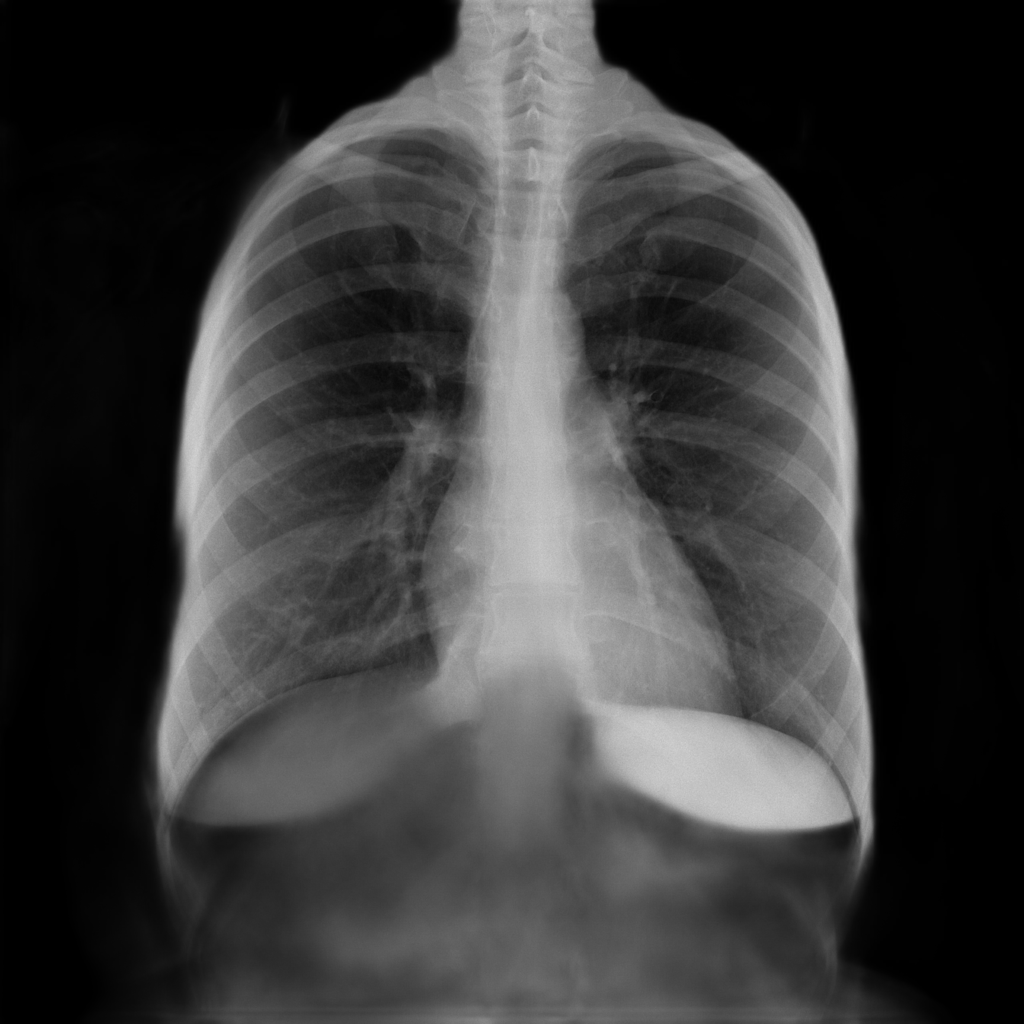

In [27]:
Image.fromarray(c)

In [14]:
import random
from time import time

# Main API Library
from PIL import Image, ImageFile, ImageOps
import time
import numpy as np

# Main Config From model
import base64
import os
from src.RestructModelings.config import get_cfg
import cv2
from src.RestructModelings import model_zoo
from src.RestructModelings.engine import DefaultPredictor
from src.RestructModelings.config import get_cfg
from src.RestructModelings.utils.visualizer import Visualizer, ColorMode
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import skimage.io as io
from src.RestructModelings.data import MetadataCatalog, DatasetCatalog
from PIL import ImageFile


In [21]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file('COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml'))
cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGES = 512
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 14
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.4
cfg.OUT_DIR = f'{os.getcwd()}/models/output/'
cfg.MODEL.WEIGHTS = ('/home/ai_car/Preprocessing-MedicalImage/results/v9/model_final.pth')
cfg['MODEL']['DEVICE'] = 'cuda:0'
predictor = DefaultPredictor(cfg)

The checkpoint state_dict contains keys that are not used by the model:
  pixel_mean
  pixel_std


In [22]:
img = Image.open('/home/ai_car/Preprocessing-MedicalImage/result/00003349_000.png')
gray_image = ImageOps.grayscale(img)
gray_image.save('/home/ai_car/Preprocessing-MedicalImage/result/00003349_000.png')
im = cv2.imread('/home/ai_car/Preprocessing-MedicalImage/result/00003349_000.png')
outputs = predictor(im)
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([0], device='cuda:0')
Boxes(tensor([[529.5946, 288.7310, 588.2438, 358.9292]], device='cuda:0'))


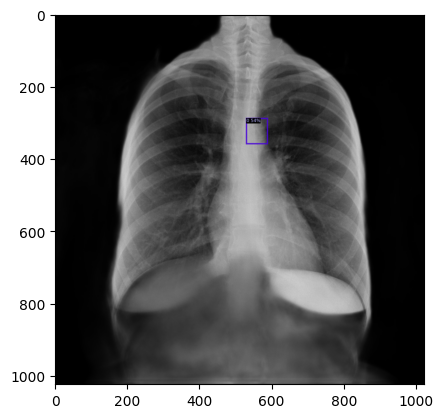

In [23]:
import matplotlib.pyplot as plt

v = Visualizer(im,
              # metadata=MetaData_PhysicalDamage,
              scale=1,
              instance_mode=ColorMode.SEGMENTATION
              )
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
out = v.get_output()
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.imshow(v.get_image()[:, :])